<a href="https://colab.research.google.com/github/harikarthicks181-cyber/project/blob/main/united.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv("creditcard.csv")

print("✔ Dataset Loaded Successfully!\n")
print(df.head())

✔ Dataset Loaded Successfully!

                                                                                                                              Unnamed: 0  \
1526  1.216619  0.658022  0.086689  2.498611  0.109647 -0.859455  0.504045 -0.224534 -0.898032  0.764618 -0.714694 -0.675120   -1.074309   
1527 -0.508662  0.977653  1.651042 -0.153578  0.098010 -0.216195  0.539328  0.193393 -0.707379 -0.192823  1.742663  0.915440    0.122999   
      1.360020 -1.221073 -0.529160 -1.688185 -0.632906 -0.113995 -0.500031 -0.169474 -2.375479  1.544276  0.211296 -0.321074    1.019723   
1528  0.845885  0.235569  0.118420  2.542229  0.211290  0.564394 -0.052084  0.362333 -0.808829  0.286366  1.705457 -0.182498   -1.525092   
     -1.558068  0.721405  1.364943 -2.266201 -0.073941  0.967624 -0.221878 -2.369751  1.554586 -1.172825 -0.369833  0.383209   -0.917587   

                                                                                                                              0

In [ ]:
df = pd.read_csv("creditcard.csv")

print("✔ Dataset Loaded Successfully!\n")


y = df.iloc[:, -1]
X = df.iloc[:, :-1]

numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

✔ Dataset Loaded Successfully!

Shape of X: (53565, 17)
Shape of y: (53565,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (32131, 17)
Testing data shape: (8033, 17)


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('passthrough', 'passthrough')
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)
print("✔ Preprocessing pipeline defined with imputation!")

✔ Preprocessing pipeline defined with imputation!


In [ ]:
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
print("Missing values in X before imputation:")
print(X.isnull().sum())

Missing values in X before imputation:
Unnamed: 0              0
0.679811981122161       0
1.1492343330762         0
0.0617609088395927      0
0.195367468121997       0
-0.00896159038380582    0
0.830299510411041       0
0.281262189749162       0
-0.0431986870074228     0
-0.307664770306287      0
0.130531375760736       0
0.339371938524295       0
-0.437575893297912      0
0.00992011779303678     0
0.260579581306944       0
0.118355236432506       0
41.71                   0
dtype: int64


Accuracy: 0.9991
Precision: 0.9600
Recall: 0.8000
ROC AUC: 0.9659


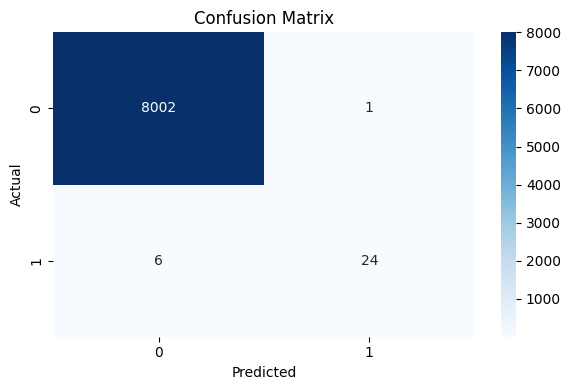

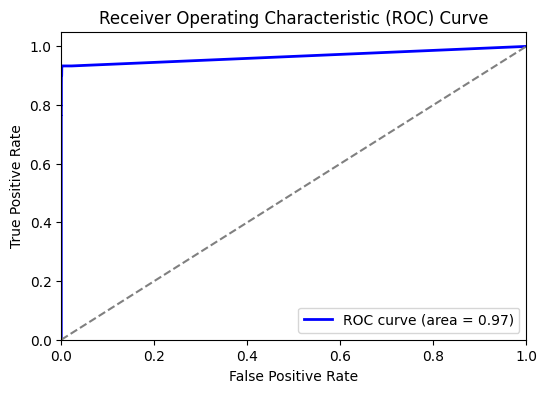

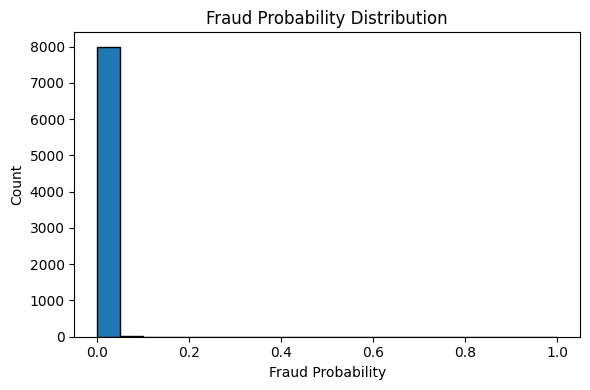

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


plt.figure(figsize=(6,4))
plt.hist(y_proba, bins=20, edgecolor="black")
plt.title("Fraud Probability Distribution")
plt.xlabel("Fraud Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:

feature_columns = X.columns.tolist()


sample_data = {col: [0.0] for col in feature_columns}
sample = pd.DataFrame(sample_data)

pred = model.predict(sample)[0]
prob = model.predict_proba(sample)[0][1]

print("\n=== SAMPLE PREDICTION ===")
print("Fraud Prediction :", pred)
print("Fraud Probability:", prob)


=== SAMPLE PREDICTION ===
Fraud Prediction : 0
Fraud Probability: 0.0


In [ ]:

df = pd.read_csv("creditcard.csv", sep=',')


y = df.iloc[:, -1]
X = df.iloc[:, :-1]


y = pd.to_numeric(y.astype(str).str.strip('"'), errors='coerce')


valid_indices = y.dropna().index
X = X.loc[valid_indices]
y = y.loc[valid_indices].astype(int)

numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('passthrough', 'passthrough')
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


nan_mask_train = y_train.isna()
X_train = X_train[~nan_mask_train]
y_train = y_train[~nan_mask_train]

nan_mask_test = y_test.isna()
X_test = X_test[~nan_mask_test]
y_test = y_test[~nan_mask_test]

print(f"X_train shape before fit: {X_train.shape}")
print(f"y_train shape before fit: {y_train.shape}")
print(f"Unique values in y_train: {y_train.unique()}")
print(f"Unique values in y_test: {y_test.unique()}")

model = Pipeline(steps=[
    ('preprocessor', preprocess),
    ('classifier', RandomForestClassifier(random_state=42))
])

model.fit(X_train, y_train)
print("✔ Model trained successfully!")

X_train shape before fit: (32131, 17)
y_train shape before fit: (32131,)
Unique values in y_train: [0 1]
Unique values in y_test: [0 1]
✔ Model trained successfully!
